# Sea Ice Index in the Arctic

https://nsidc.org/data/seaice_index

https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/data/

In [44]:
import pandas as pd

In [5]:
data = pd.read_csv(
    "N_seaice_extent_daily_v3.0.csv",
    header=0, skiprows=[1], parse_dates=[['Year', ' Month', ' Day']],
)
data.columns = ['date', 'extent', 'missing', 'source']
data['date'] = pd.to_datetime(data['date'])
data.head()

,date,extent,missing,source
0,1978-10-26,10.231,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
1,1978-10-28,10.420,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
2,1978-10-30,10.557,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
3,1978-11-01,10.670,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...
4,1978-11-03,10.777,0.0,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.03/nt_19...


In [6]:
data = data[["date", "extent"]]

<Axes: xlabel='date'>

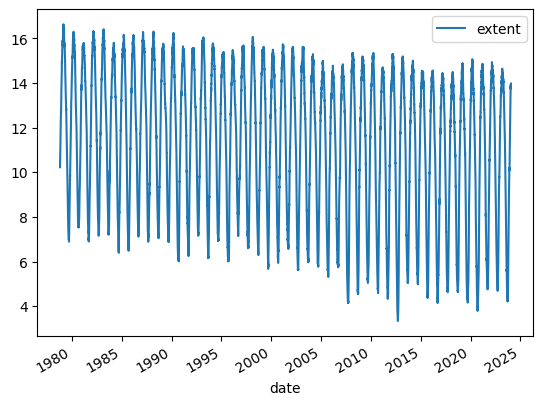

In [7]:
data.plot(x='date', y='extent', )

## Compare with baseline

In [8]:
data['doy'] = data['date'].dt.dayofyear
data

,date,extent,doy
0,1978-10-26,10.231,299
1,1978-10-28,10.420,301
2,1978-10-30,10.557,303
3,1978-11-01,10.670,305
4,1978-11-03,10.777,307
...,...,...,...
14864,2024-01-13,13.907,13
14865,2024-01-14,13.938,14
14866,2024-01-15,13.926,15
14867,2024-01-16,13.920,16


In [46]:
data_ave = pd.read_csv(
    "N_seaice_extent_climatology_1981-2010_v3.0.csv",
    skiprows=[0],
)
data_ave = data_ave[['DOY', '      50th']]
data_ave.columns = [["doy", "median"]]
data_ave

,doy,median
0,1,13.823
1,2,13.886
2,3,13.884
3,4,13.925
4,5,14.036
...,...,...
361,362,13.561
362,363,13.546
363,364,13.653
364,365,13.702


In [47]:
(data_ave["median"].to_numpy().flatten()*1000).astype(int).tolist()

[13823,
 13886,
 13884,
 13925,
 14036,
 14139,
 14188,
 14303,
 14310,
 14240,
 14265,
 14332,
 14398,
 14401,
 14449,
 14476,
 14526,
 14602,
 14638,
 14715,
 14698,
 14680,
 14731,
 14717,
 14773,
 14783,
 14803,
 14880,
 14892,
 14954,
 14963,
 15040,
 15076,
 15147,
 15171,
 15222,
 15173,
 15204,
 15229,
 15266,
 15261,
 15301,
 15303,
 15317,
 15364,
 15382,
 15385,
 15420,
 15420,
 15472,
 15475,
 15483,
 15467,
 15466,
 15498,
 15496,
 15527,
 15542,
 15548,
 15556,
 15558,
 15478,
 15478,
 15449,
 15439,
 15444,
 15532,
 15483,
 15487,
 15489,
 15474,
 15538,
 15511,
 15499,
 15496,
 15483,
 15487,
 15494,
 15454,
 15451,
 15402,
 15472,
 15489,
 15473,
 15453,
 15387,
 15374,
 15389,
 15391,
 15397,
 15313,
 15270,
 15197,
 15128,
 15111,
 15097,
 15090,
 15064,
 15002,
 14890,
 14859,
 14749,
 14711,
 14701,
 14658,
 14649,
 14617,
 14602,
 14561,
 14550,
 14523,
 14503,
 14477,
 14443,
 14425,
 14345,
 14298,
 14256,
 14187,
 14109,
 14036,
 13922,
 13874,
 13862,
 13786,


<Axes: >

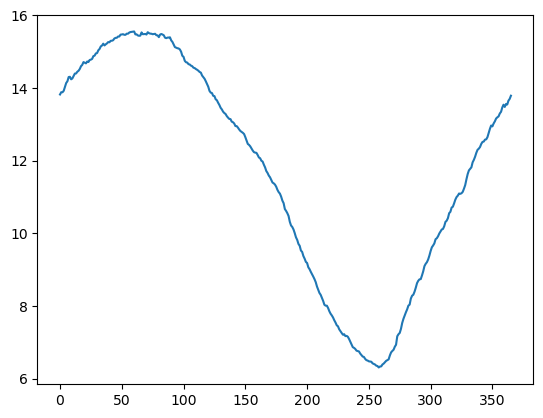

In [48]:
data_ave["median"].plot(legend=False)

In [49]:
data_ave["median"].describe()

,median
count,366.000000
mean,11.703131
std,3.053653
min,6.305000
25%,8.967750
50%,12.315500
75%,14.558250
max,15.558000


In [285]:
data.iloc[-1], data_ave.iloc[17-1], (data.iloc[-1]["extent"] - data_ave.iloc[17-1, 1]) / data_ave.iloc[17-1, 1]

(date      2024-01-17 00:00:00
 extent                 13.976
 doy                        17
 res                 -0.037863
 Name: 14868, dtype: object,
 doy       17.000
 median    14.526
 Name: 16, dtype: float64,
 -0.037863141952361214)

In [ ]:
data["res"] = data.apply(lambda x: (x["extent"] - data_ave.iloc[x["doy"]-1, 1]), axis=1)

In [290]:
data["res"] = data.apply(lambda x: (x["extent"] - data_ave.iloc[x["doy"]-1, 1]) / data_ave.iloc[x["doy"]-1, 1], axis=1)
data["res"].iloc[-1]

-0.037863141952361214

<Axes: xlabel='date'>

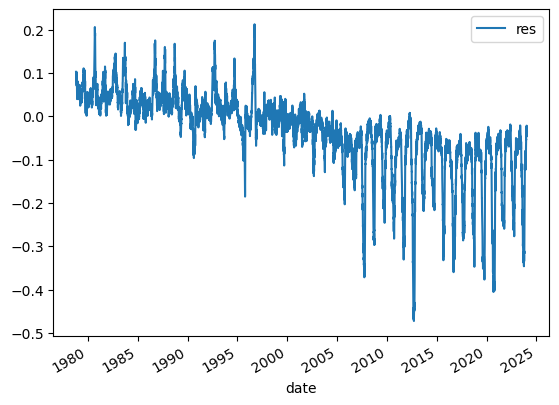

In [289]:
data.plot(x='date', y='res', )

## Rolling mean explorations

In [276]:
df = pd.DataFrame(data["res"])
df.index = data["date"]

<Axes: xlabel='date'>

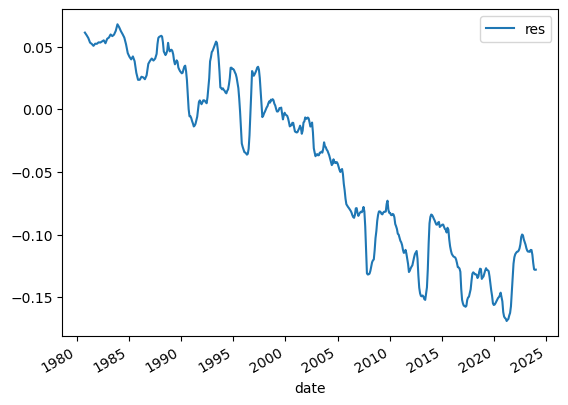

In [275]:
df.rolling(30).mean()[::30].rolling(12).mean().plot()

<Axes: xlabel='date'>

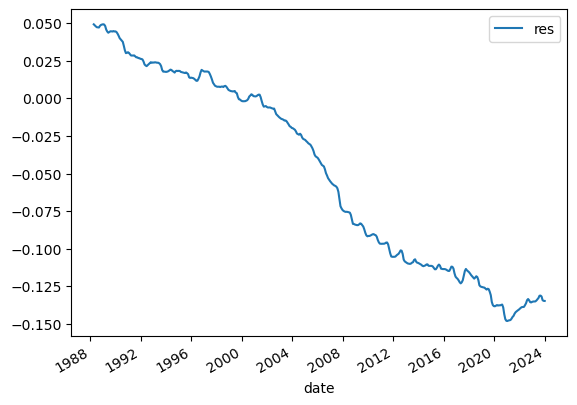

In [274]:
df.rolling(30).mean()[::30].rolling(60).mean().plot()

In [9]:
data = pd.read_csv(
    "https://noaadata.apps.nsidc.org/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv",
    header=0, skiprows=[1], parse_dates=[['Year', ' Month', ' Day']],
)
data.columns = ['date', 'extent', 'missing', 'source']
data['date'] = pd.to_datetime(data['date'])
extent = data.iloc[-1]

date                                     2024-01-25 00:00:00
extent                                                14.274
missing                                                  0.0
source     ['/ecs/DP4/PM/NSIDC-0081.002/2024.01.24/NSIDC0...
Name: 14876, dtype: object

In [11]:
extent = data.iloc[-1]
extent

date                                     2024-01-25 00:00:00
extent                                                14.274
missing                                                  0.0
source     ['/ecs/DP4/PM/NSIDC-0081.002/2024.01.24/NSIDC0...
Name: 14876, dtype: object